In [2]:
# ---------------------------- Imports ---------------------------------
import os
import sys
import time
import numpy as np
import pandas as pd

# Include local module path
sys.path.append('/Users/nassirmohammad/projects/clustering')

In [9]:
# Data generation utilities
from data.synthetic.one_dim_data import generate_clustering_1d_data
from data.synthetic.one_dim_data_gauss import generate_clustering_1d_gauss_anomalies, plot_cluster_histograms
from data.synthetic.two_dim_data_gauss import generate_clustering_2d_gauss_data, plot_clustering_results_2d

# clustering method 
from clustering_methods import novel_clustering

# Plotting tools
from utilities.plotting import plot_clusters

Number of labelled examples: 100
Number of unlabelled examples: 9900
Percentage of labelled data: 1.00%


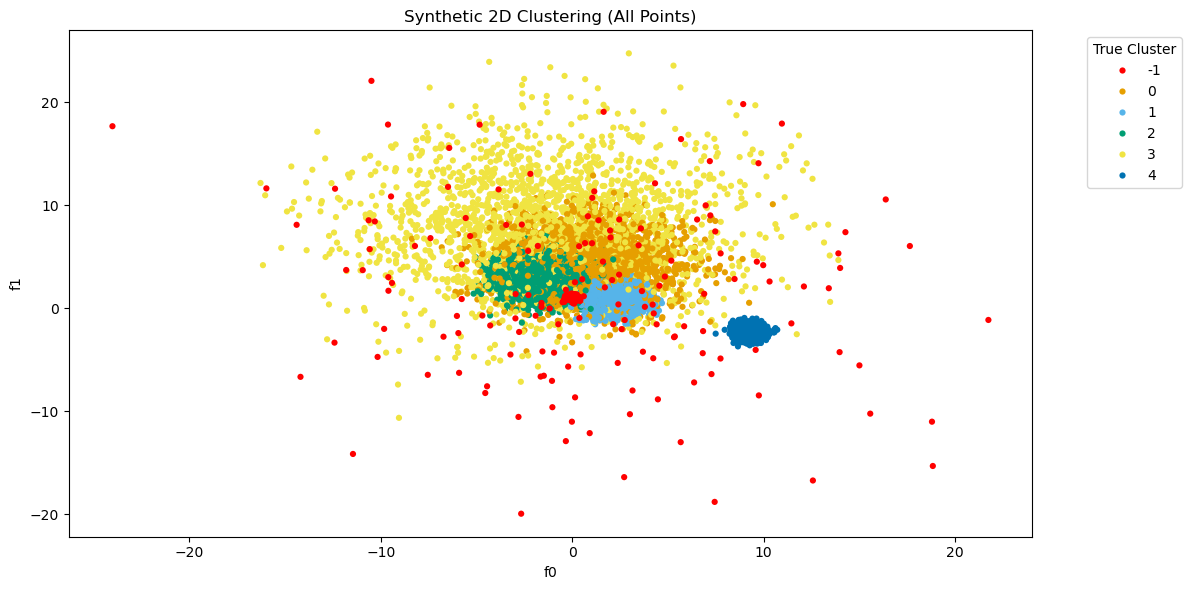

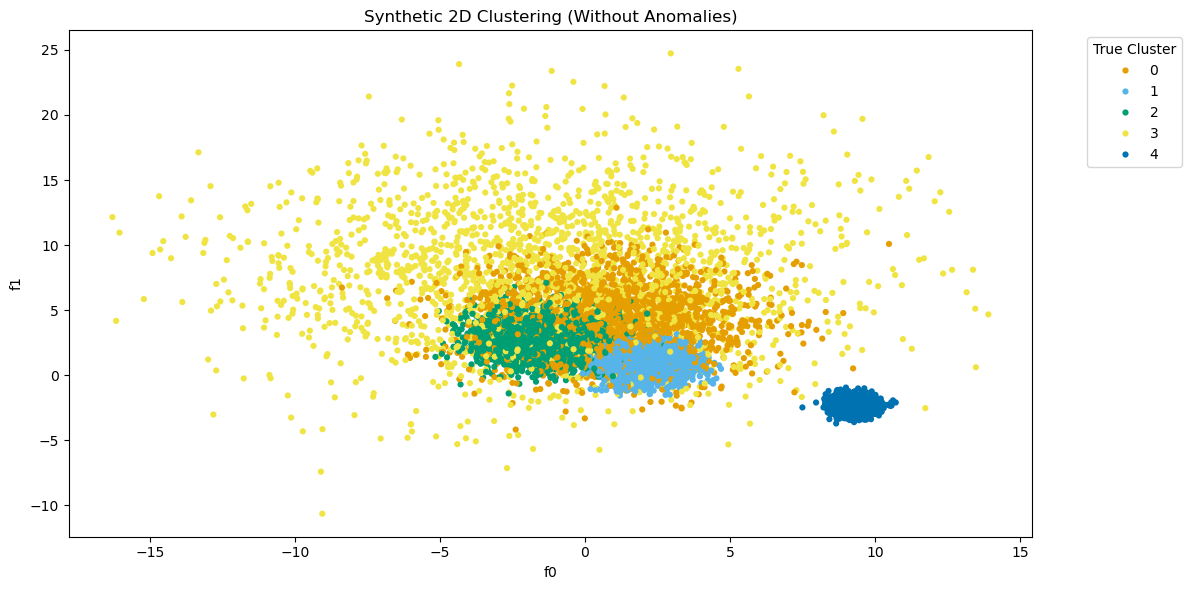

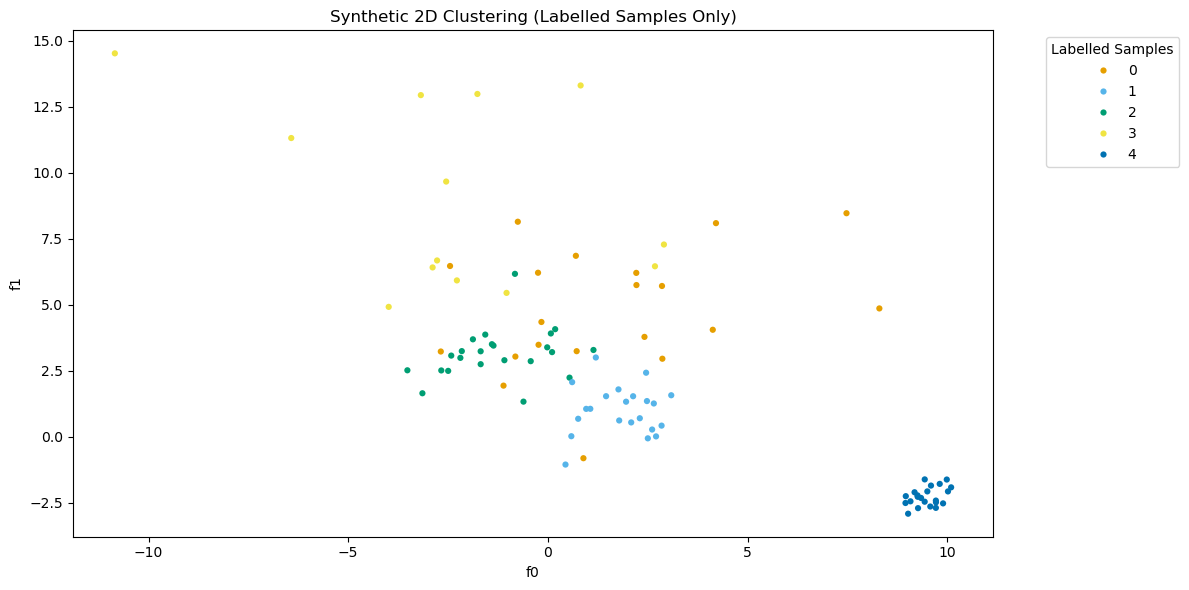

In [4]:
# ---------------------------- Data Setup ---------------------------------

# Define dataset mode
mode = "2d_gauss"  # Options: "1d_simple", "1d_gauss", "2d_gauss"
k = None  # Number of clusters (used by some algorithms)

# Load selected dataset
if mode == "1d_simple":
    df = generate_clustering_1d_data()
    plot_cluster_histograms(df)
    k = 3

elif mode == "1d_gauss":
    df = generate_clustering_1d_gauss_anomalies()
    plot_cluster_histograms(df)
    k = 3

elif mode == "2d_gauss":
    df = generate_clustering_2d_gauss_data()
    plot_clustering_results_2d(df)
    k = 5

# Extract feature columns from the DataFrame
feature_columns = [col for col in df.columns if col not in {'y_true', 'y_live'}]

dataset_name = mode

In [7]:
start_time = time.time()
df = novel_clustering(df, feature_columns, seeds='y_live')
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Execution time: 0.22 seconds


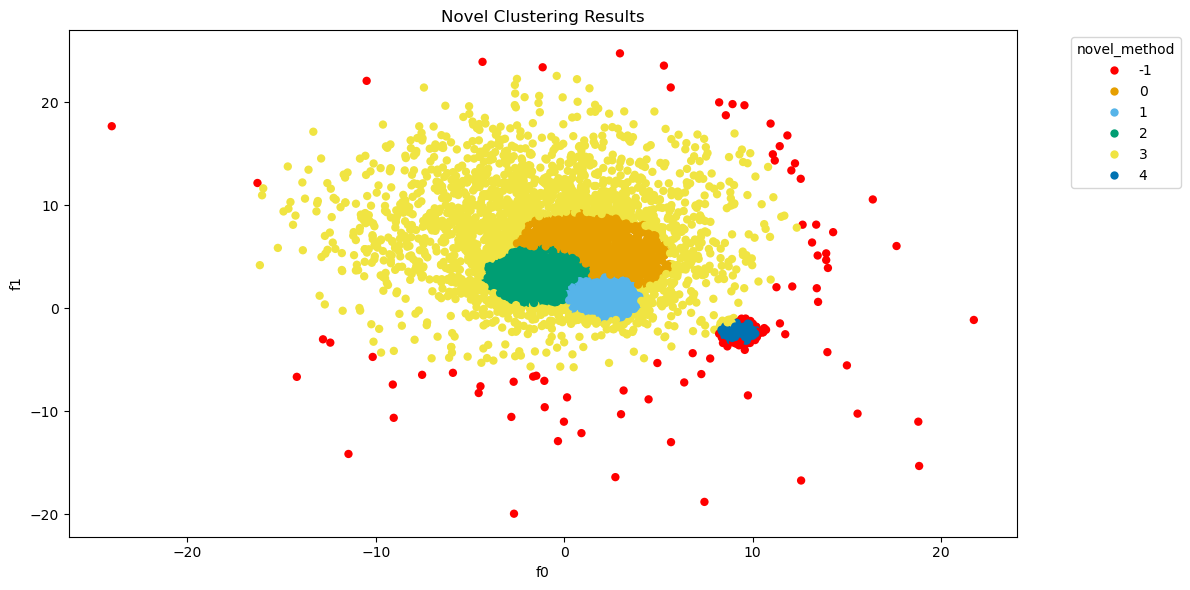

In [10]:
plot_clusters(df, feature_columns, label_column='novel_method', title="Novel Clustering Results")